In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
# from lr_utils import load_dataset

%matplotlib inline

In [2]:
import numpy as np
import h5py
    
    
def load_dataset():
    train_dataset = h5py.File('dataset/Train.h5', "r")
    train_set_x_orig = np.array(train_dataset["images"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["labels"][:]) # your train set labels

    test_dataset = h5py.File('dataset/Test.h5', "r")
    test_set_x_orig = np.array(test_dataset["images"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["labels"][:]) # your test set labels
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig



In [3]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y = load_dataset()

In [4]:
import numpy as np

num_classes = np.arange(5)
num_classes

array([0, 1, 2, 3, 4])

TypeError: can only concatenate str (not "numpy.int32") to str

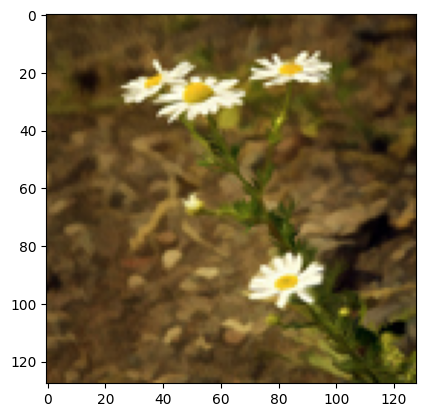

In [5]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[:, index]) + ", it's a '" + num_classes[np.squeeze(train_set_y[:, index])] + "' picture.")

In [6]:
m_train = train_set_x_orig.shape[0]
m_test  = test_set_x_orig.shape[0]
num_px  = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 2626
Number of testing examples: m_test = 120
Height/Width of each image: num_px = 128
Each image is of size: (128, 128, 3)
train_set_x shape: (2626, 128, 128, 3)
train_set_y shape: (1, 2626)
test_set_x shape: (120, 128, 128, 3)
test_set_y shape: (1, 120)


In [7]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (49152, 2626)
train_set_y shape: (1, 2626)
test_set_x_flatten shape: (49152, 120)
test_set_y shape: (1, 120)
sanity check after reshaping: [213 216 224 212 214]


In [8]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [9]:
#softmax function
def softmax(x):
    exp_x = np.exp(x- np.max(x, axis=0, keepdims=True))   
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)

In [10]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim,num_classes):
    
    w = np.zeros((dim,num_classes))
    b = np.zeros((num_classes,))
    
    return w, b

In [11]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):    
    m = X.shape[1]
    Z = np.dot(w.T, X) + b[:, np.newaxis]                           
    A = softmax(Z)                                    
    cost = -np.sum(Y * np.log(A)) / m
    
    dZ = A - Y
    dw = (np.dot(X, dZ.T))/m
    db = (np.sum(A-Y))/m
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [12]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):

    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        w -= learning_rate * dw
        b -= learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


In [13]:
def predict(w, b, X):
    Z = np.dot(w.T, X) + b.reshape(-1, 1)
    A = softmax(Z)
    
    Y_prediction = np.argmax(A, axis=0).reshape(1, X.shape[1])
    return Y_prediction

In [17]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):

    num_classes = Y_train.shape[0]
    num_features = X_train.shape[0]
    
    w,b = initialize_with_zeros(num_features, num_classes)
    
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    train_accuracy = 100 - np.mean(Y_prediction_train != np.argmax(Y_train, axis=0)) * 100
    test_accuracy = 100 - np.mean(Y_prediction_test != np.argmax(Y_test, axis=0)) * 100

    print("train accuracy: {} %".format(train_accuracy))
    print("test accuracy: {} %".format(test_accuracy))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train": Y_prediction_train, 
         "w": w, 
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    
    return d


In [18]:
train_set_y_one_hot = np.eye(5)[train_set_y.reshape(-1)].T
test_set_y_one_hot = np.eye(5)[test_set_y.reshape(-1)].T 

In [19]:
d = model(train_set_x, train_set_y_one_hot, test_set_x, test_set_y_one_hot, num_iterations=2000, learning_rate=0.01, print_cost=True)

Cost after iteration 0: 1.609438
Cost after iteration 100: 16.979993
Cost after iteration 200: 12.105826
Cost after iteration 300: 12.682517
Cost after iteration 400: 3.520495
Cost after iteration 500: 4.459866
Cost after iteration 600: 4.801223
Cost after iteration 700: 10.369571
Cost after iteration 800: 6.710869
Cost after iteration 900: 8.927126
Cost after iteration 1000: 4.298039
Cost after iteration 1100: 8.230162
Cost after iteration 1200: 3.775412
Cost after iteration 1300: 6.828349
Cost after iteration 1400: 4.582025
Cost after iteration 1500: 5.632745
Cost after iteration 1600: 5.845358
Cost after iteration 1700: 4.693414
Cost after iteration 1800: 6.248735
Cost after iteration 1900: 4.755462
train accuracy: 44.28789032749428 %
test accuracy: 32.5 %


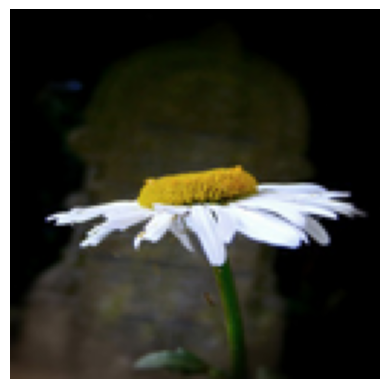

y = 0, you predicted that it is a "class_0" picture.


In [29]:
import matplotlib.pyplot as plt

index = 20

plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
plt.axis('off')
plt.show()

true_label = np.argmax(test_set_y_one_hot[:, index])

predicted_label_index = int(d["Y_prediction_test"][0, index])

classes = ["class_0", "class_1", "class_2", "class_3", "class_4"]

if predicted_label_index < len(classes):
    predicted_label = classes[predicted_label_index]
    print("y = " + str(true_label) + ", you predicted that it is a \"" + predicted_label + "\" picture.")
else:
    print("Predicted index is out of range for class labels.")


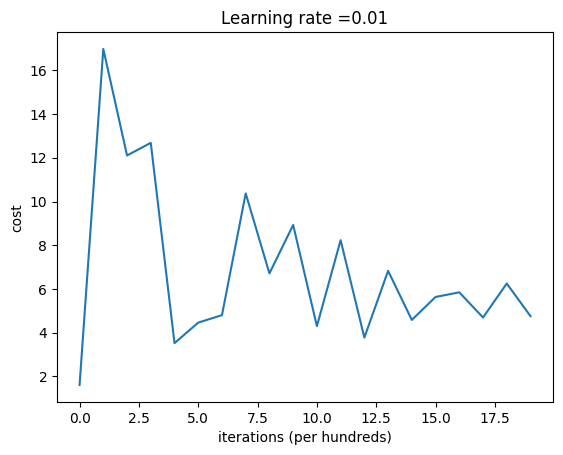

In [30]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()